# Python Program using sequential model and keras libary to predict monthly spendings for year 2024 #

In [81]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tkinter as tk
from tkinter import filedialog
import os
#Imports ^

### Reading The Data From Desired CSV ###

In [82]:
CSV = pd.read_csv(r'C:\Users\Callum Apps\Desktop\finance tracker\CallumAppsYearlySpending.csv') # download csv from files differ per device
CSV.head() #display csv

,Transaction Date,Transaction Type,Sort Code,Account Number,Transaction Description,Debit Amount,Credit Amount,Balance
0,08/12/2023,DEB,'77-49-26,63314763,RUSU BAR,2.5,NaN,181.48
1,07/12/2023,FPI,'77-49-26,63314763,ETHAN WARD,NaN,9.5,183.98
2,07/12/2023,NaN,'77-49-26,63314763,RETURNED DD,NaN,200.3,174.48
3,07/12/2023,DD,'77-49-26,63314763,THAMES WATER,200.3,NaN,-25.82
4,07/12/2023,DD,'77-49-26,63314763,URBAN JUNGLE,5.0,NaN,174.48


### Pre-Processing of the data ###

In [83]:
CSV.shape
CSV.isnull().sum()
CSV.dropna()

,Transaction Date,Transaction Type,Sort Code,Account Number,Transaction Description,Debit Amount,Credit Amount,Balance


Total Number of Transactions:  1373
Number of high Transactions above $100:  63
Which means that  4.59 % of your purchases were over $100 for the year 2023.
Total Number of Transactions:  1373
Number of high Transactions above $100:  63
Whcih means that  4.59 % of your purchases were over %100 for the year 2023.


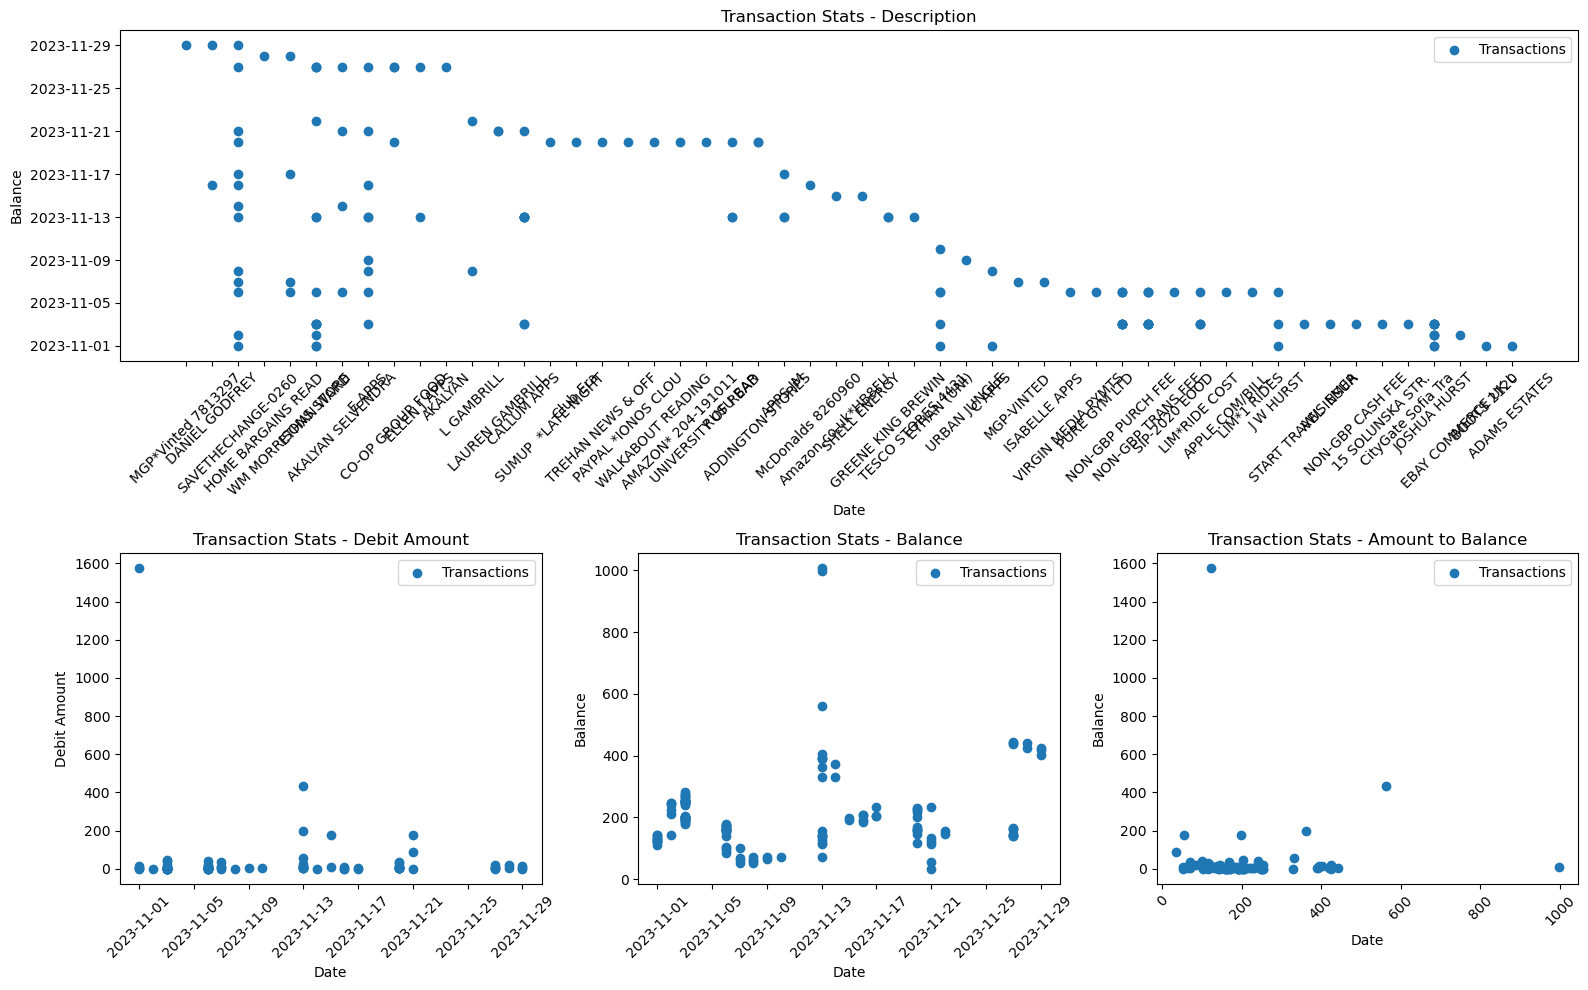

In [84]:
CSV.shape
CSV.isnull().sum()
CSV.dropna()

highTransactions = len(CSV[(CSV['Debit Amount'] > 100)])
allTransactions = len(CSV[(CSV['Debit Amount']) > 0])

if allTransactions != 0:
    HTRatio = (float(highTransactions) / allTransactions) * 100
    HTRatio = "{:.2f}".format(HTRatio)
    print("Total Number of Transactions: ", allTransactions)
    print("Number of high Transactions above $100: ", highTransactions)
    print("Which means that ", HTRatio, "% of your purchases were over $100 for the year 2023.")
else:
    print("Empty Transaction History")

transactionsFiltered = CSV[(CSV['Debit Amount'] == True) & (
(CSV['Debit Amount'] > 100))
]

print ("Total Number of Transactions: ", allTransactions)
print ("Number of high Transactions above $100: ", highTransactions)
print ("Whcih means that ", HTRatio, "% of your purchases were over %100 for the year 2023.")

CSV['Transaction Date'] = pd.to_datetime(CSV['Transaction Date'], format='%d/%m/%Y')

# Define the date range for filtering
start_date = '2023-11-01'
end_date = '2023-11-29'

# Filter transactions within the specified date range
filtered_transactions = CSV[(CSV['Transaction Date'] >= start_date) & (CSV['Transaction Date'] <= end_date)]

plt.figure(figsize=(16, 10))

# First subplot
plt.subplot(2,3,4)  # 2 rows, 1 column, subplot 1
plt.scatter(filtered_transactions['Transaction Date'], filtered_transactions['Debit Amount'], label='Transactions')
plt.title("Transaction Stats - Debit Amount")
plt.xlabel('Date')
plt.ylabel('Debit Amount')
plt.xticks(rotation=45)
plt.legend()

# Second subplot
plt.subplot(2,3,5)  # 2 rows, 1 column, subplot 2
plt.scatter(filtered_transactions['Transaction Date'], filtered_transactions['Balance'], label='Transactions')
plt.title("Transaction Stats - Balance")
plt.xlabel('Date')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.legend()


# Third subplot
plt.subplot(2,3,6)  # 2 rows, 1 column, subplot 2
plt.scatter(filtered_transactions['Balance'],filtered_transactions['Debit Amount'], label='Transactions')
plt.title("Transaction Stats - Amount to Balance")
plt.xlabel('Date')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.legend()

# Fourth subplot
plt.subplot(2,3,(1,3))  # 2 rows, 1 column, subplot 2
plt.scatter(filtered_transactions['Transaction Description'], filtered_transactions['Transaction Date'], label='Transactions')
plt.title("Transaction Stats - Description")
plt.xlabel('Date')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()  # Adjusts subplot parameters for a tight layout
plt.show()

